### Loading libraries and the data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_weather = pd.read_csv("Weather Data.csv")
df_weather.head(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
# changing the date format
df_weather['Date/Time'] = pd.to_datetime(df_weather['Date/Time'])

In [5]:
#split time and date to new columns
df_weather['Time'] = [d.time() for d in df_weather['Date/Time']]
df_weather['Date'] = [d.date() for d in df_weather['Date/Time']]
df_weather.head(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time,Date
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,00:00:00,2012-01-01
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,01:00:00,2012-01-01
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",02:00:00,2012-01-01
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",03:00:00,2012-01-01
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,04:00:00,2012-01-01


In [6]:
#delete old colum Date/Time 
df_weather.drop(df_weather.columns[[0]] , axis=1 , inplace=True)
df_weather.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time,Date
0,-1.8,-3.9,86,4,8.0,101.24,Fog,00:00:00,2012-01-01
1,-1.8,-3.7,87,4,8.0,101.24,Fog,01:00:00,2012-01-01
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",02:00:00,2012-01-01
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",03:00:00,2012-01-01
4,-1.5,-3.3,88,7,4.8,101.23,Fog,04:00:00,2012-01-01


In [7]:
#This will give number of NaN values in every column.
df_weather.isnull().sum(axis = 0)

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
Time                0
Date                0
dtype: int64

In [8]:
# parsing the date and extract the year, month , day
df_weather['year'] = pd.to_datetime(df_weather['Date']).dt.year
df_weather['month'] = pd.to_datetime(df_weather['Date']).dt.month
df_weather['day'] = pd.to_datetime(df_weather['Date']).dt.day

# Exploratoration and visualisation

<AxesSubplot:xlabel='month', ylabel='Temp_C'>

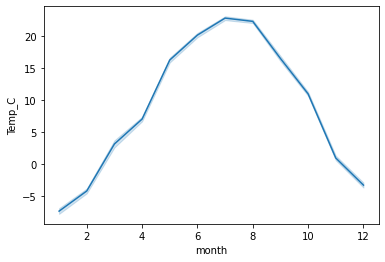

In [9]:
# the average of Temp among all months for all years

sns.lineplot(x="month", y="Temp_C", data=df_weather)

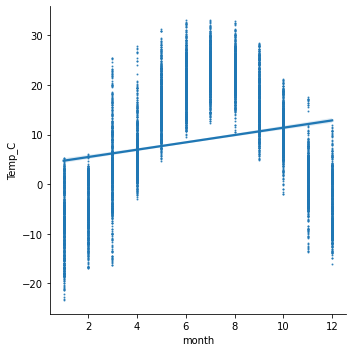

In [10]:
sns.lmplot(x="month", y="Temp_C", data=df_weather, scatter_kws={"s": 1})

<AxesSubplot:xlabel='month', ylabel='Rel Hum_%'>

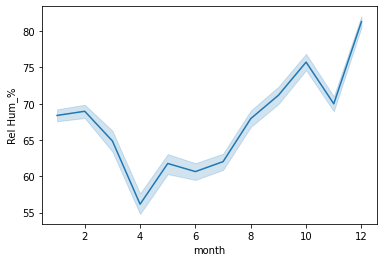

In [11]:
# the average of hum among all months for all years

sns.lineplot(x="month", y="Rel Hum_%", data=df_weather)

<AxesSubplot:xlabel='month', ylabel='Wind Speed_km/h'>

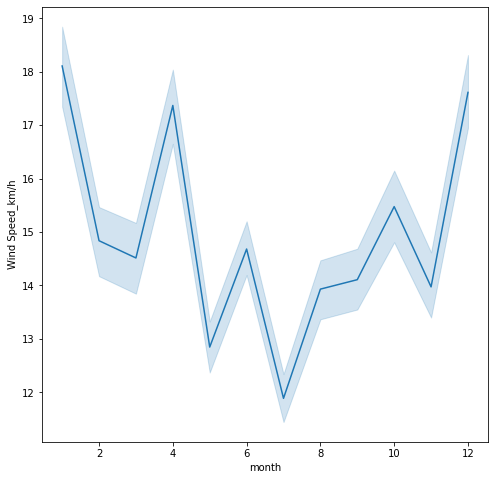

In [12]:
# the average of Wind Speed among all months for all years
fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(x="month", y="Wind Speed_km/h", data=df_weather)

<AxesSubplot:xlabel='month', ylabel='Weather'>

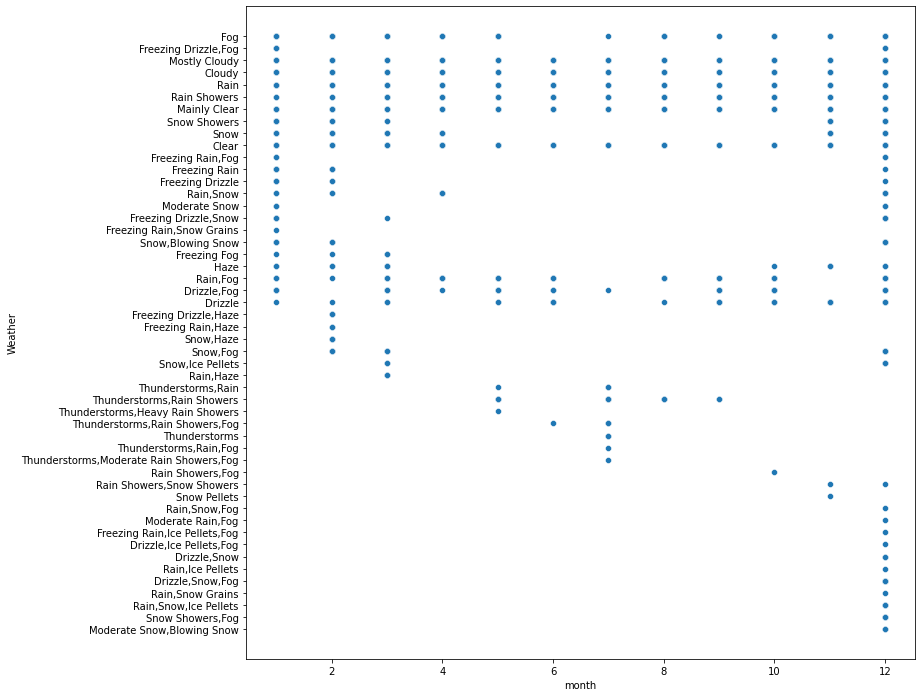

In [13]:
# the average of Wewther among all months for all years
fig, ax = plt.subplots(figsize=(12, 12))

sns.scatterplot(x="month", y="Weather", data=df_weather)

In [39]:
print (df_weather['Temp_C'].max())
print(df_weather['Temp_C'].min())

33.0
-23.3


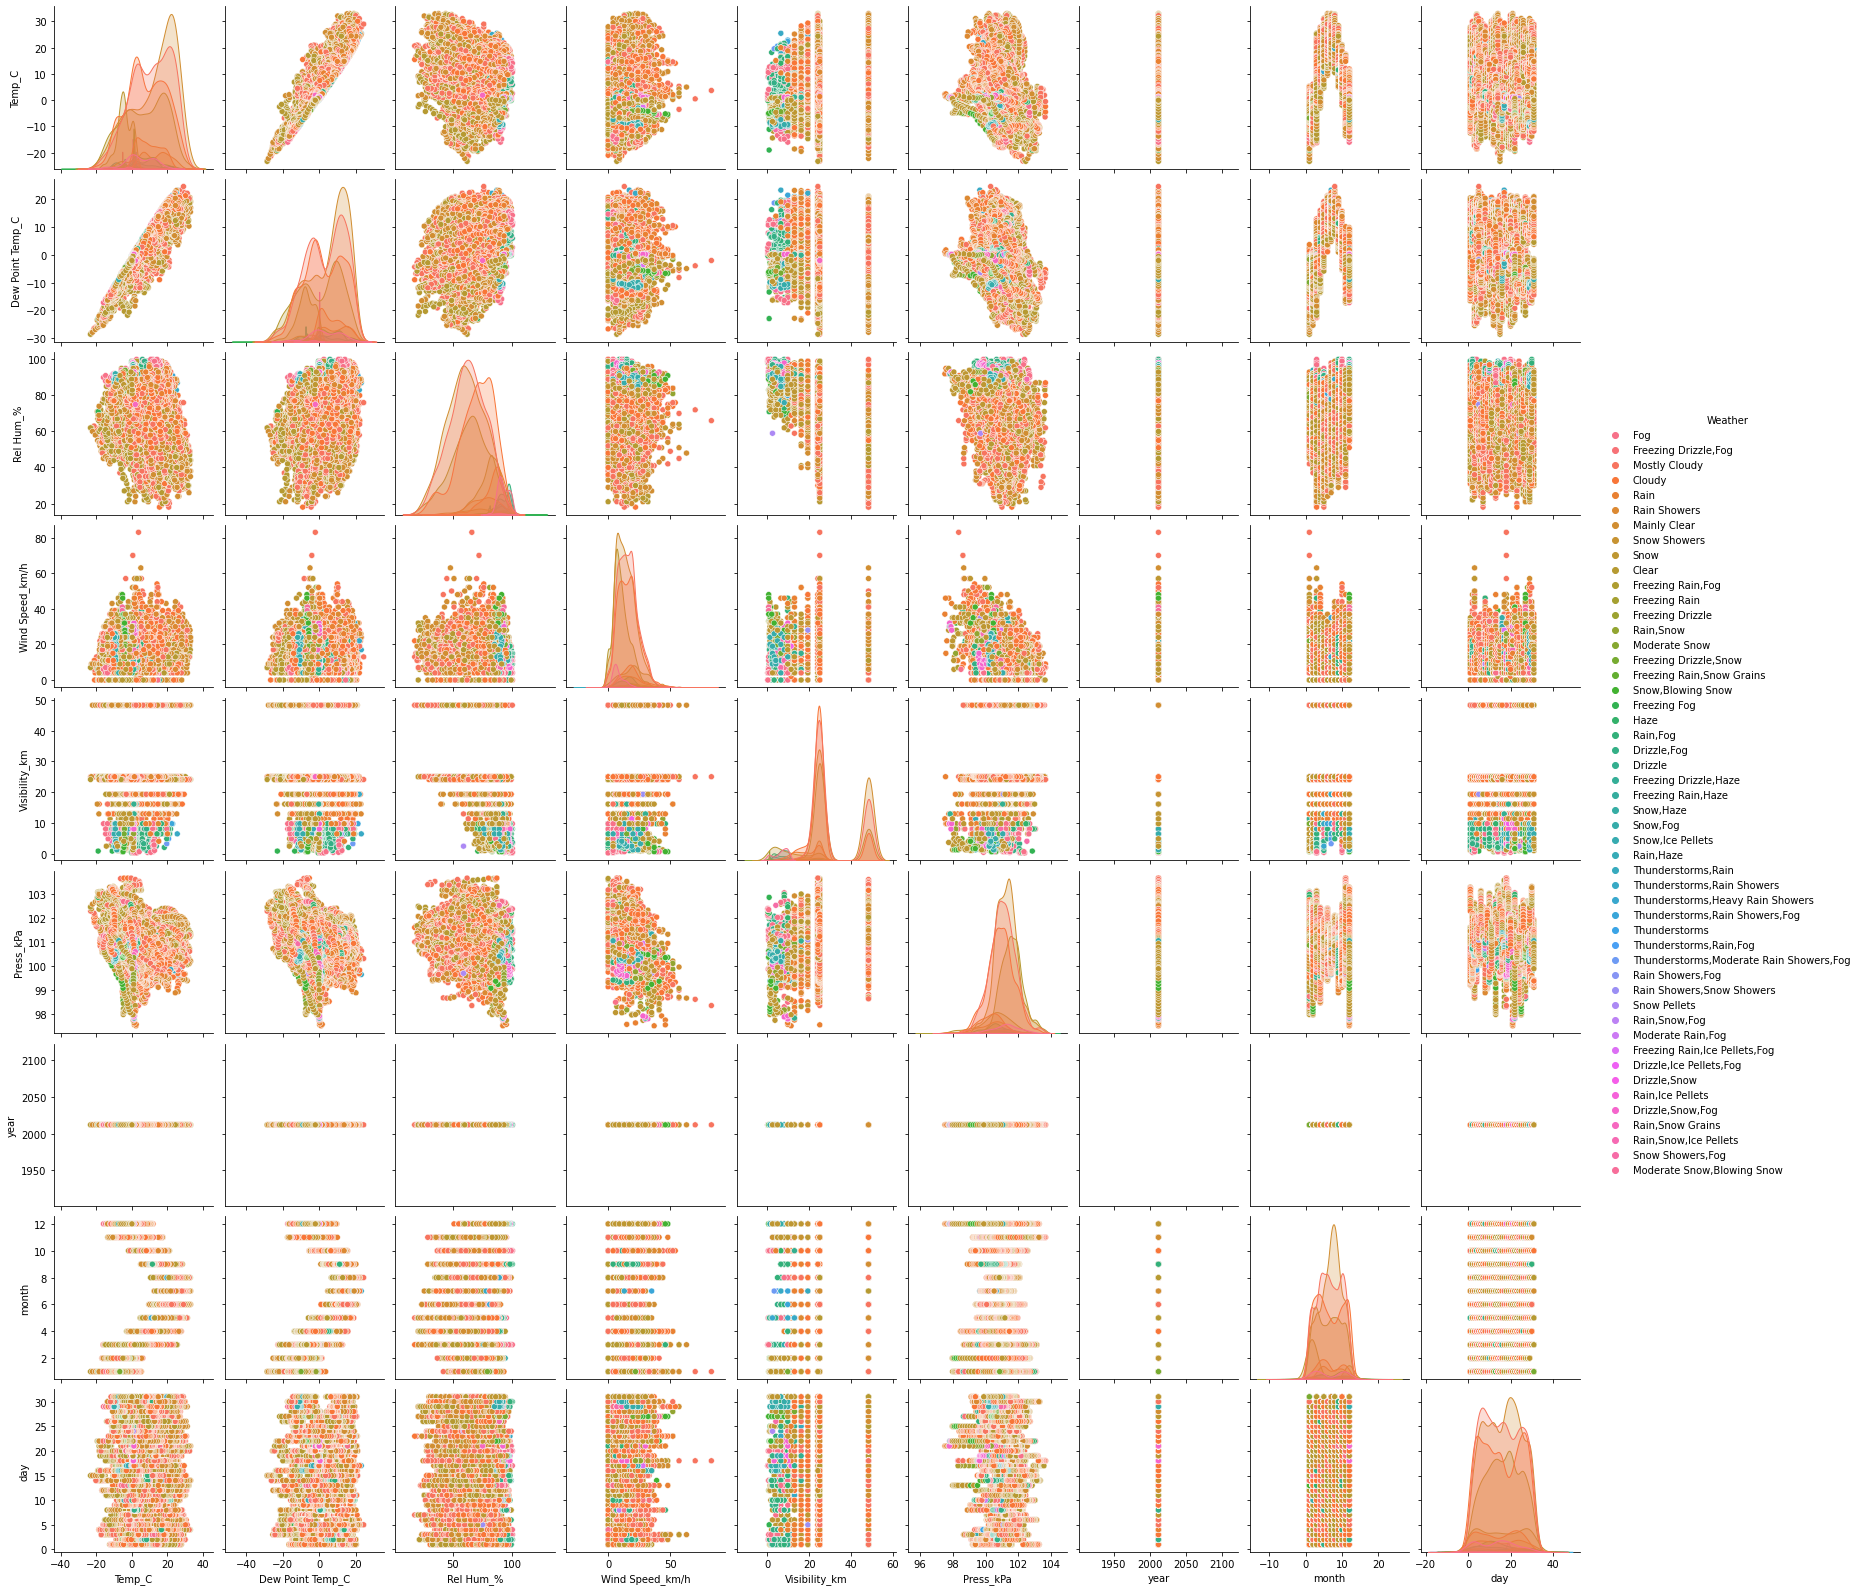

In [41]:
sns.pairplot(df_weather,hue="Weather")


# Conclusion
Our environment is highly affected by Global Warming. From our analysis it's been a clear observation that their is sudden increase in temperature and sudden decrease in temperature over ten years. But, in case of humidity, it is seen that it neither rise of fall instead stayed same over 10 years.